In [138]:
import pandas as pd
import matplotlib.pyplot as plt

input_path = "../data/input/"
output_path = "../data/output/"

plt.rcParams["figure.figsize"] = (16,8)

## Input time series

In [191]:
# input_file = 'seq_d1'
input_file = 'series'
f= open(input_path+input_file+'.csv', 'r')
if input_file == 'seq_d1':
    values = f.readline().strip().split(",") 
else:
    values = f.readlines()
    values = [v.replace("\n","") for v in values]
    values = list(map(int, values))
f.close()
print(f"{len(values)} values available")

118 values available


In [192]:
values_threshold = 1000
df_seq = pd.DataFrame(values[:values_threshold],columns=["Data"])
print(f"Selecting the first {values_threshold} values")

Selecting the first 1000 values


In [193]:
df_seq.head(10)

,Data
0,41
1,39
2,50
3,40
4,43
5,38
6,44
7,35
8,39
9,35


## Predictions

In [216]:
def compare(data,predicted):
    plt.plot(data)
    plt.plot(predicted)
    plt.ylabel('Values')
    plt.xlabel("Time")
    plt.legend(['true data', 'predicted']);
    plt.show()

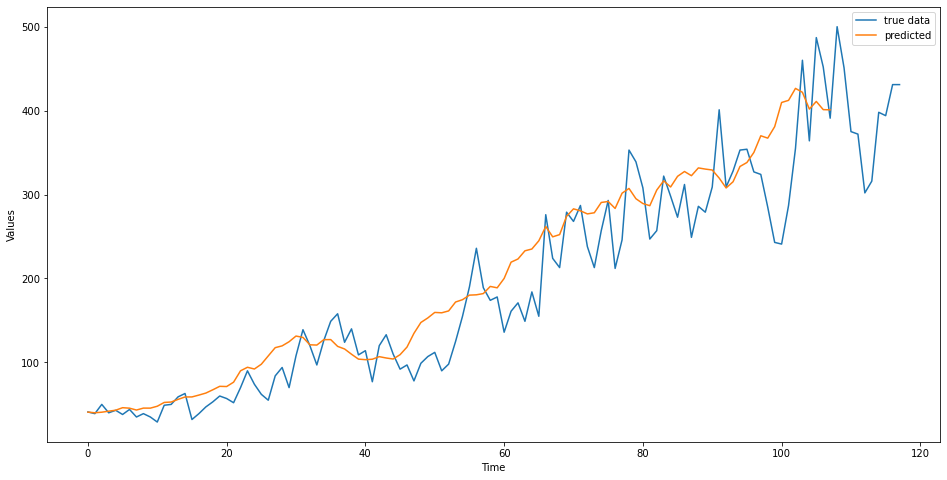

In [242]:
df_pred = pd.read_csv(output_path+algorithm+"_predictions.csv")
compare(df_seq["Data"],df_pred["predictions"])

7.054113930563895


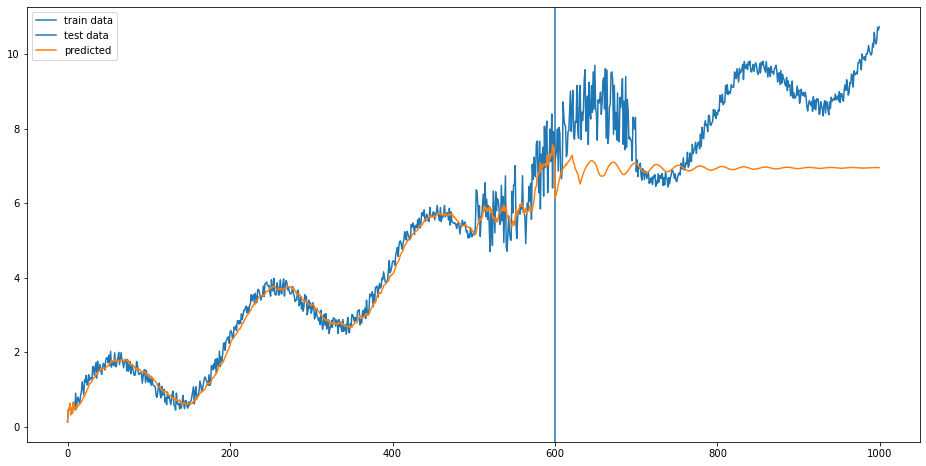

In [293]:
df_pred = pd.read_csv(output_path+algorithm+"_predictions.csv")
df_test = pd.read_csv(output_path+algorithm+"_test.csv")
df_gt = pd.read_csv(output_path+algorithm+"_input.csv")
input_data = list(df_gt["input"])[:1000]
test_data = list(df_test["test"])[:1000]
predicted_data = list(df_pred["predictions"])[:1000]
plt.axvline(600, label='pyplot vertical line')

# input_data = list(df_gt["input"])[550:650]
# test_data = list(df_test["test"])[550:650]
# predicted_data = list(df_pred["predictions"])[550:650]
# plt.axvline(50, label='pyplot vertical line')

# plt.plot(input_data)
plt.plot(test_data)
plt.plot(predicted_data)

print(predicted_data[700])

plt.legend(['train data','test data', 'predicted']);
# plt.ylabel('Values')
# plt.xlabel("Time")
# plt.legend(['true data', 'predicted']);
plt.show()

## Arima

In [220]:
def plotRMSE(algorithm):
    df = pd.read_csv(output_path+algorithm+"_RMSE.csv")
    plt.plot(df["RMSE"])
    plt.ylabel('RMSE')
    plt.xlabel("Iterations")
    plt.show()

In [237]:
def plotW(algorithm):
    df = pd.read_csv(output_path+algorithm+"_w.csv")
    w_names = []
    for i in range(len(df["w"])):
        w_names.append(str(i))
    plt.bar(list(w_names), df["w"])
    plt.xlabel("Weights")
    plt.ylabel("Values")
    plt.title("Learned W")
    plt.show()

###  Online Gradient Descent

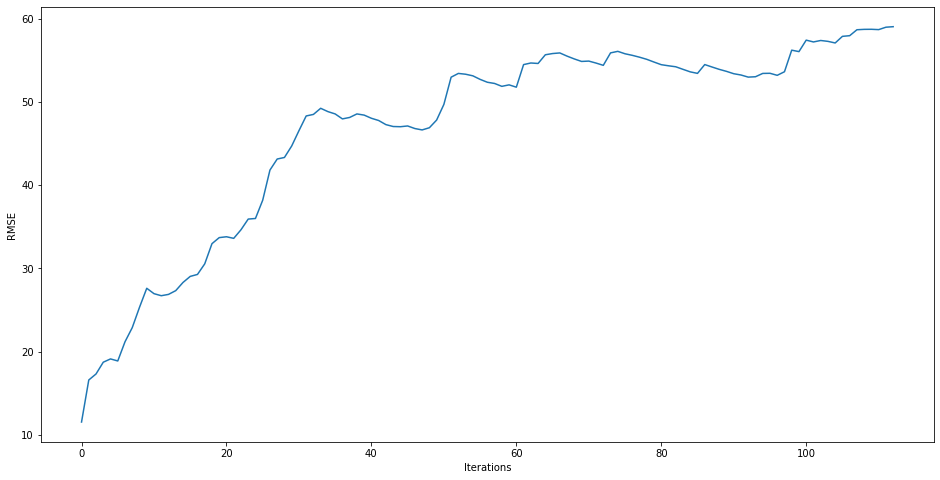

In [235]:
plotRMSE("ogd")

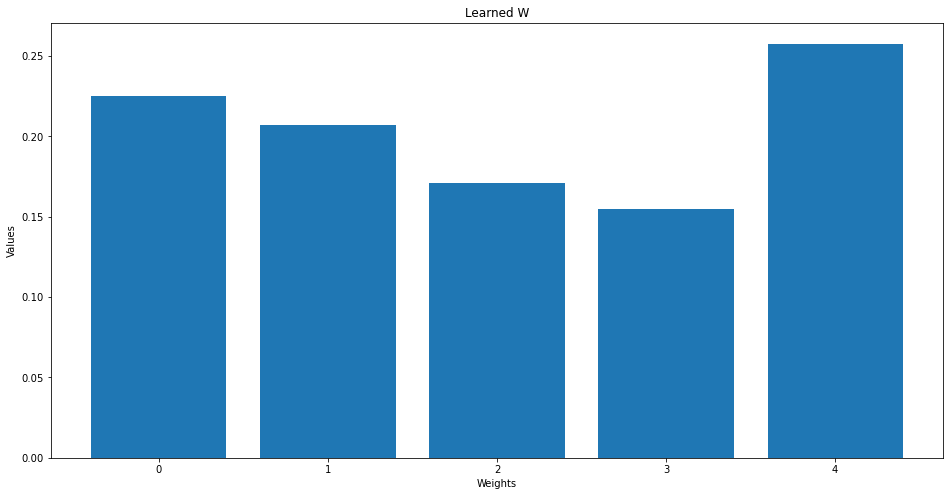

In [238]:
plotW("ogd")

###  Online Newton Step

> still to fix algorithm

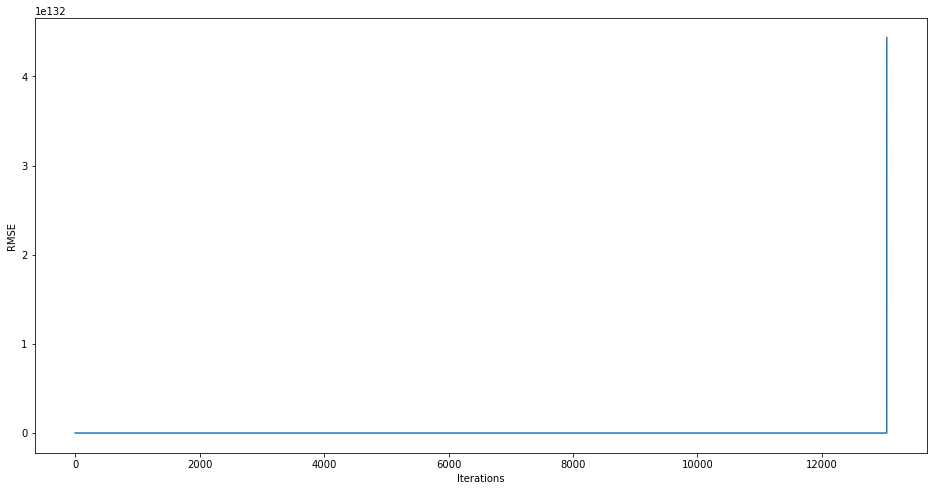

In [222]:
plotRMSE("ons")